# Math 104C Homework 4
**Name.** <span style="color:red">Kelly Wang</span> <br>
**Id.** <span style="color:red">5351010</span>

## Exercise 1
#### (a)
Suppose the given second order finite difference approximation to the second derivative 
$$D_0^2u_j = \frac{u_{j-1}-2u_j+u_{j+1}}{h^2}$$
Substitute $v_j^{(m)} = e^{imjh}$ into $u_j$ for $j = 1, \dots, M-1$ and $h = \pi/M$ and apply Euler's formula
$$
\begin{align}
D_0^2v_j^{(m)} &= \frac{e^{im(j-1)h}-2e^{imjh}+e^{im(j+1)h}}{h^2}\\
&= \frac{e^{imjh}}{h^2}\left(e^{-imh}-2+e^{imh}\right)\\
&= \frac{e^{imjh}}{h^2}\left(e^{imh/2}-e^{-imh/2}\right)\\
\end{align}
$$
Note that 
$$
\begin{align}
\left(e^{\alpha x} - e^{- \alpha x}\right)^2 &= \left(e^{\alpha x} - e^{-\alpha x}\right)\left(e^{\alpha x} - e^{-\alpha x}\right)\\
&= e^{2\alpha x} - e^0 - e^0 + e^{-2\alpha x}\\
&= e^{2\alpha x} - 1 - 1 + e^{-2\alpha x}\\
&= e^{2\alpha x} - 2 + e^{-2\alpha x}\\
\end{align}
$$
Then since we have the following, 
$$
\begin{align}
e^{\alpha x} &= \cos(\alpha x) + i\sin(\alpha x)\\
e^{-\alpha x} &= \cos(-\alpha x) + i\sin(-\alpha x)\\
e^{\alpha x} - e^{-\alpha x} &= \left(\cos(\alpha x) - \cos(-\alpha x)\right) + i\left(\sin(\alpha x) - \sin(-\alpha x)\right)\\
&= 0 + 2i\sin(\alpha x)
\end{align}
$$

We can use this result to simplify our substitution. 

$$
\begin{align}
\frac{e^{imjh}}{h^2}\left(e^{imh/2} - e^{-imh/2}\right)^2 &= \frac{e^{imjh}}{h^2}\left(2i\sin(mh/2)\right)\\
&= \frac{e^{imjh}}{h^2}(-4)\sin^2(\frac{mh}{2})\\
&= \frac{-4}{h^2}e^{imjh}\left(\frac{1-\cos(mh)}{2}\right) \quad \quad \text{(double angle formula)}\\
&= \frac{4}{h^2}e^{imjh}\left(\frac{\cos(mh)-1}{2}\right)\\
&= \frac{2}{h^2}e^{imjh}\left(\cos(mh)-1\right)\\
\end{align}
$$

Since $v_j^{(m)} = e^{imjh}$, we have $D_0^2v_j^{(m)} = \frac{2}{h^2}\left(\cos mh - 1\right)v_j^{(m)}$ as desired. 

#### (b)
To show that the farthest eigenvalue from the origin approaches $-4/h^2$ as $h \rightarrow 0$ let $\lambda_{M-1, h} = \max_{m = 1}^{M-1}|\lambda _{m, h}|$. 
$$
\begin{align}
\lambda_{M-1, h} &= \frac{2}{h^2}\left(\cos (M-1)h - 1\right)\\
&= \frac{2}{h^2}\left(\cos(M-1)\frac{\pi}{M} -1 \right)
\end{align}
$$
Then take the limit of the ratio as $h \rightarrow 0$, 
$$
\begin{align}
&\lim_{h \rightarrow 0}\frac{\lambda_{M-1, h}}{-4/h^2}\\
&\lim_{h \rightarrow 0}\frac{\frac{2}{h^2}\left(\cos(M-1)\frac{\pi}{M} -1 \right)}{-4/h^2}\\
&\lim_{h \rightarrow 0}\frac{\cos (\pi - h) - 1}{-2} = \frac{\cos \pi - 1}{-2} = 1\\
\end{align}
$$

This shows us that the ODE system $\frac{du_j(t)}{dt} = D_0^2u_j(t), \quad j = 1, 2, \dots, M-1$ is stiff because our ratios between $\lambda_m$ and $\lambda_h$ are fairly large. A large stiffness index determines a system is stiff. This could also be verified numerically with python. 

In [7]:
import numpy as np

def lambda_mM(m, M):
        h = np.pi/m
        return 2*(np.cos(m*h)-1)/h

M = 5

print([lambda_mM(m,M) for m in range(1, M*3)])

[-1.2732395447351628, -2.5464790894703255, -3.8197186342054885, -5.092958178940651, -6.366197723675814, -7.639437268410977, -8.91267681314614, -10.185916357881302, -11.459155902616464, -12.732395447351628, -14.00563499208679, -15.278874536821954, -16.552114081557118, -17.82535362629228]


## Exercise 2

#### (a)
Suppose the Heat Equation in the unit square $[0,1] x [0,1]$, $u_t = u_{xx} + u_{yy}$ with the initial condition $$ u(0,x,y) = \sin(\pi x)\sin(\pi y)$$ and homogeneous Dirichlet boundary condition $u = 0$. Let us implement the ADI method to find an approximation to this initial-boundary value problem in the cell below. <br/><br/>
Numerical stability does not play a role in our choice of $k$ and $h$ since the ADI method is unconditionally stable. 
#### (b)
After implementing the ADI method, we want to suppose that $v(k)$ is a numerical approximation at a fixed time and decrease $k$ where $k = k/2, k/4$ using the same time and the ratio would yield us our accuracy check. Here we are using $k = 0.01$. 
#### (c)
Refer to the following cells for plots.

#### (d)
For 2D heat equations, ADI would be the better choice because ADI gives tridiagonal matrices to solve in the 2D case whereas Crank-Nicolson does not. More specifically, Crank-Nicolson results in a very complicated set of equations in multiple dimensions which make it more costly to solve than with a tridiagonal matrix. With ADI, the equations that have to be solved in each step have a simpler structure and can be done with tridiagonal matrix algorithms. 


In [129]:
#code for 2(a)

#initial condition function f(0,x,y)
def f(x,y):
    return (np.sin(np.pi*x) * np.sin(np.pi*y))

"""
D = diffusion constant 
f = initial condition function 
L = length of unit square domain 
M = # of time step 
N = # of spacial step 
T = max time

"""

def ADI(D, L, M, N, T):
    h       = L/M                  #spacial
    k       = float(T/N)           #time
    x       = np.arange(0, L+h, h) 
    y       = np.arange(0, L+h, h)
    alpha   = D*(k/(2*h**2))
    
    size_r  = (N+1, M+1, M+1)      #size for result
    size_i  = (M+1, M+1)           #size for initial condition 
    result  = np.zeros(size_r)     
    initial = np.zeros(size_i)
    A       = np.zeros((M-1, M-1)) #For tridiagonal matrix building 
    U       = np.zeros(size_i)     #var for U star
    u       = np.zeros(size_i)     


    
"""
Build Tridiagonal Matrix A; 
Find initial arr using the given initial condition function;
Store result as 3D arr where 1st dimension corresponds to time
2nd & 3rd represents the solution of the given time 

"""
    for i in range(0, M+1):
        if i < M-1:
            A[i][i] = 1+2*alpha
            if i == M-2: break
            A[i][i+1] = -alpha
            A[i+1][i] = -alpha
            
        for j in range(0, M+1):
            if i < M-1 and j < M-1:
                initial[i+1][j+1] = f(x[i+1], y[j+1])
            result[0][i][j] = initial[i][j]
            
"""
Apply ADI method formula

"""            
    for i in range(1, N+1): 
        for j in range(1, M): 
            U_ = []
            for k in range(2, M+1):
                U_.append(alpha*initial[k-2][j]+(1-2*alpha)*initial[k-1][j]+alpha*initial[k][j])
            U[1:-1, j] = np.linalg.solve(A, U_)
            
        for l in range(1,M):
            u_ = []
            for k in range(2,M+1):
                u_.append(alpha*U[l][k-2]+(1-2*alpha)*U[l][k-1]+alpha*U[l][k])
            u[l, 1:-1]   = np.linalg.solve(A, u_)
            result[i][l] = u[l]
            initial      = result[i]

    return result


In [130]:
vk  = ADI(1, 1, 100, 100, 2)[1][25][25]
vk2 = ADI(1, 1, 100, 200, 2)[2][25][25]
vk4 = ADI(1, 1, 100, 400, 2)[4][25][25]

R=(vk-vk2)/(vk2-vk4)
print(R)

4.0189032933326425


In [150]:
import matplotlib.pyplot as plt
from matplotlib import rc

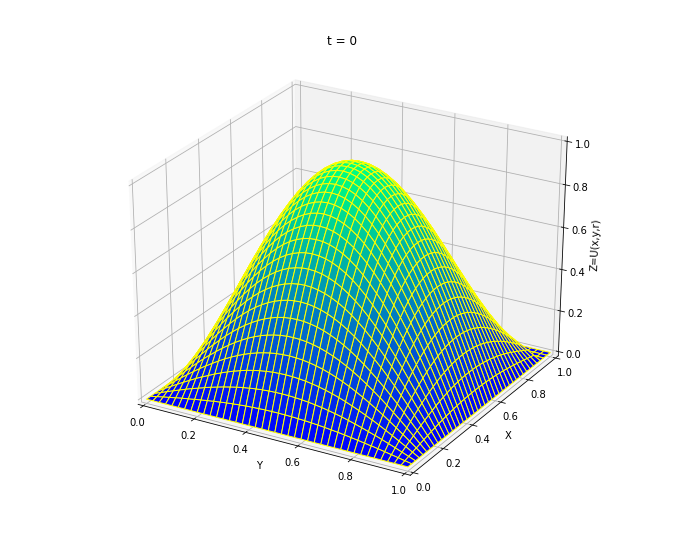

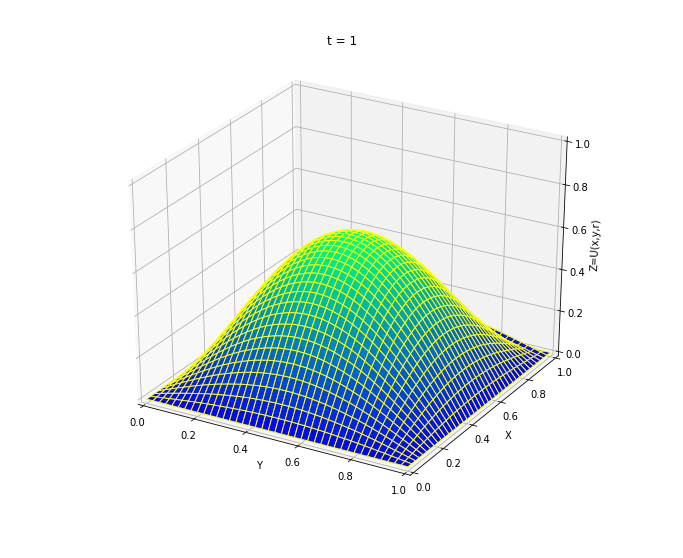

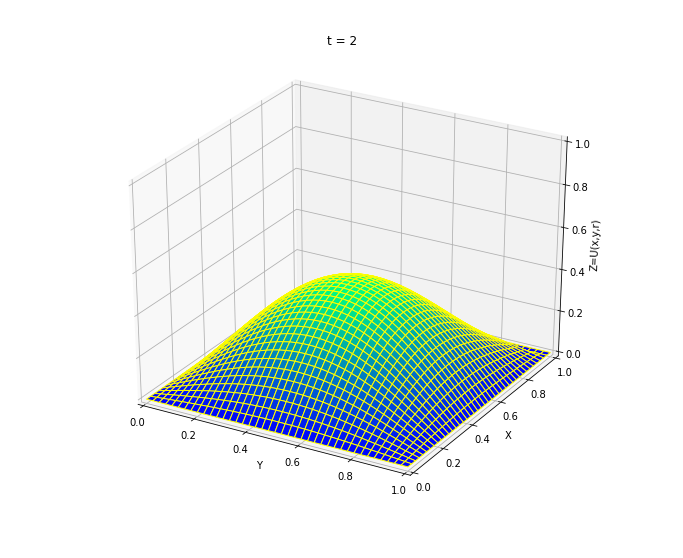

In [173]:
#plot for 2c

M      = 40
x      = np.linspace(0, 1, M+1)
y      = np.linspace(0, 1, M+1)
X, Y   = np.meshgrid(x,y)
u      = ADI(1, 1, M, 100, 2)

for i in range(3):
    fig = plt.figure(figsize=(12,10))
    ax  = plt.axes(projection='3d')
    ax.plot_surface(X,Y,u[i],cmap='winter', edgecolor='yellow')
    ax.set_xlim3d(0,1)
    ax.set_ylim3d(0,1)
    ax.set_zlim3d(0,1)
    ax.set_xlabel('Y')
    ax.set_ylabel('X')
    ax.set_zlabel('Z=U(x,y,r)')
    ax.set_title('t = '+ str(i))
    ax.dist = 12
    plt.show()